## *Modelling ancient areas for date palms (Phoenix species, Arecaceae): Bayesian analysis of biological and cultural evidence*

Inferencia Bayesiana con atributos binarios condicionalmente independientes.

In [1]:
%matplotlib inline

# local en ventana independiente:
# %matplotlib tk

import pandas as pd
import numpy as np
from collections import Counter

Lectura de los datos.

In [2]:
df = pd.read_csv('http://robot.inf.um.es/material/data/evidence_data.csv',sep=';')

In [3]:
list(df.columns)

['Mints and references',
 'Present day locality',
 'Palm-tree evidence period barycenter',
 'Palm-tree evidence period',
 'Palm groves',
 'Coinages',
 'Date remains',
 'Inflorescence',
 'Leaves',
 'Stems and charcoal',
 'Pollen',
 'Phytoliths',
 'Texts',
 'Pottery',
 'Wood paintings, papyri and scrolls',
 'Jewelry, gold cups and seals',
 'Rock and Wall painting and mosaic',
 'Sculpture (stone, bronze and wood)',
 'References',
 'Taxa',
 'Latitude',
 'Long Deg',
 'Long Min',
 'Long Seg',
 'Longitude',
 'Altitude',
 'a10']

In [4]:
evi_name = list(df.columns)[4:18]
evi_short = "palmGrov coin datRe inflor leave stemCh pollen phytol texts potter paint jewel rockP sculpt".split()
list(zip(evi_short, evi_name))

[('palmGrov', 'Palm groves'),
 ('coin', 'Coinages'),
 ('datRe', 'Date remains'),
 ('inflor', 'Inflorescence'),
 ('leave', 'Leaves'),
 ('stemCh', 'Stems and charcoal'),
 ('pollen', 'Pollen'),
 ('phytol', 'Phytoliths'),
 ('texts', 'Texts'),
 ('potter', 'Pottery'),
 ('paint', 'Wood paintings, papyri and scrolls'),
 ('jewel', 'Jewelry, gold cups and seals'),
 ('rockP', 'Rock and Wall painting and mosaic'),
 ('sculpt', 'Sculpture (stone, bronze and wood)')]

In [5]:
df.loc[0]

Mints and references                    Acre, Haifa Bay, North, Israel
Present day locality                       Ace Ptolemais (Galilaea) 8,
Palm-tree evidence period barycenter                             47 BC
Palm-tree evidence period                                          -47
Palm groves                                                          0
Coinages                                                             1
Date remains                                                         0
Inflorescence                                                        0
Leaves                                                               0
Stems and charcoal                                                   0
Pollen                                                               0
Phytoliths                                                           0
Texts                                                                0
Pottery                                                              0
Wood p

Columnas de interés.

In [6]:
bindf = df[df.columns[4:18]]
bindf[:10]

,Palm groves,Coinages,Date remains,Inflorescence,Leaves,Stems and charcoal,Pollen,Phytoliths,Texts,Pottery,"Wood paintings, papyri and scrolls","Jewelry, gold cups and seals",Rock and Wall painting and mosaic,"Sculpture (stone, bronze and wood)"
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,0,0,0,0


Tipos de palmera.

In [7]:
print(set(df['Taxa']))
phoenix = np.where(np.array(df['Taxa'])=='Phoenix')
phoenix

{'P theophrasti', 'P caespitosa', 'Phoenix', 'P reclinata', 'P arabica', 'P iberica', 'P canariensis', 'P bohemica', 'P atlantica', 'P dactylifera'}


(array([1521, 1569, 1605, 1606, 1717, 1754, 1826, 1827, 1849, 1851, 1852,
        1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863,
        1883, 1884, 1895]),)

Extraemos los tipos de palmera:

In [8]:
palm_type = list(df.Taxa[df["Palm groves"]==1])

Extracción de las columnas de interés a un array.

In [9]:
bindata = np.array(bindf)
bindata

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

Comprobamos que en todas las filas hay un solo 1.

In [10]:
Counter(bindata.sum(axis=1))

Counter({1: 2833})

Extraemos la posición geográfica de cada ítem.

In [11]:
location = df[["Longitude","Latitude"]].apply(np.vectorize(lambda x: float(x.replace(',','.'))))
location[:10]

,Longitude,Latitude
0,35.081667,32.927778
1,29.916667,31.200000
2,29.916667,31.200000
3,35.837222,40.656389
4,20.841389,38.922222
5,20.841389,38.922222
6,36.150000,36.200000
7,36.150000,36.200000
8,36.150000,36.200000
9,36.150000,36.200000


Preparamos el dibujo de mapas.

In [12]:
import cartopy
import cartopy.feature as cpf
import matplotlib.pyplot as plt

import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

lat_lon = cartopy.crs.PlateCarree()

In [13]:
def genmap(extent, figsize, grid=2):
    fig = plt.figure(figsize=figsize)
    ax = fig.gca(projection=cartopy.crs.Mercator())
    lon1,lon2,lat1,lat2 = extent
    
    ax.add_feature(cpf.LAND)
    ax.add_feature(cpf.OCEAN)
    ax.add_feature(cpf.COASTLINE)
    ax.add_feature(cpf.BORDERS, linestyle=':')
    ax.add_feature(cpf.LAKES,   alpha=0.5)
    ax.add_feature(cpf.RIVERS)

    if grid is not None:
        gl = ax.gridlines(crs=lat_lon, draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5, linestyle='--')
        gl.xlabels_top = False
        gl.ylabels_left = False
        gl.xlines = True
        gl.ylocator = mticker.FixedLocator(range(lat1-grid,lat2+grid,grid))
        gl.xlocator = mticker.FixedLocator(range(lon1-grid,lon2+grid,grid))
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'size': 8, 'color': 'gray'}
        gl.ylabel_style = {'size': 12, 'color': 'gray'}

    ax.set_extent(extent,crs=lat_lon)
    return fig

Mostramos evidencias en una región pequeña.

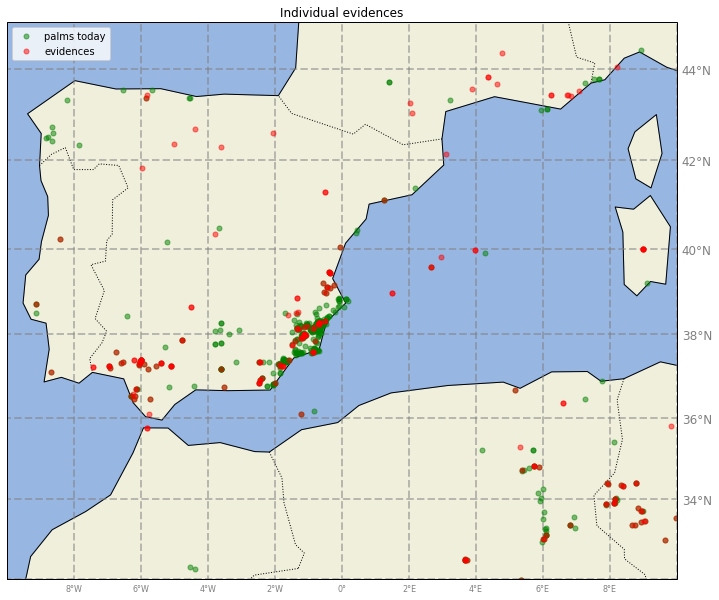

In [14]:
genmap(figsize=(12,12), extent=[-10, 10, 32, 45])
#genmap(figsize=(18,18), extent=[-20,70,4,54], grid=None);
pos = plt.plot(*np.array(location[bindata[:,0]==1]).T, '.',color='green', markerSize=10, alpha=0.5, transform=lat_lon,label='palms today');
plt.plot(*np.array(location[bindata[:,0]==0]).T, '.',color='red', markerSize=10, alpha=0.5, transform=lat_lon,label='evidences');
plt.legend();
plt.title('Individual evidences');

Mostramos la región de estudio completa.

In [15]:
#region = [0,10,0,10]
region = [-30,74,10,54]

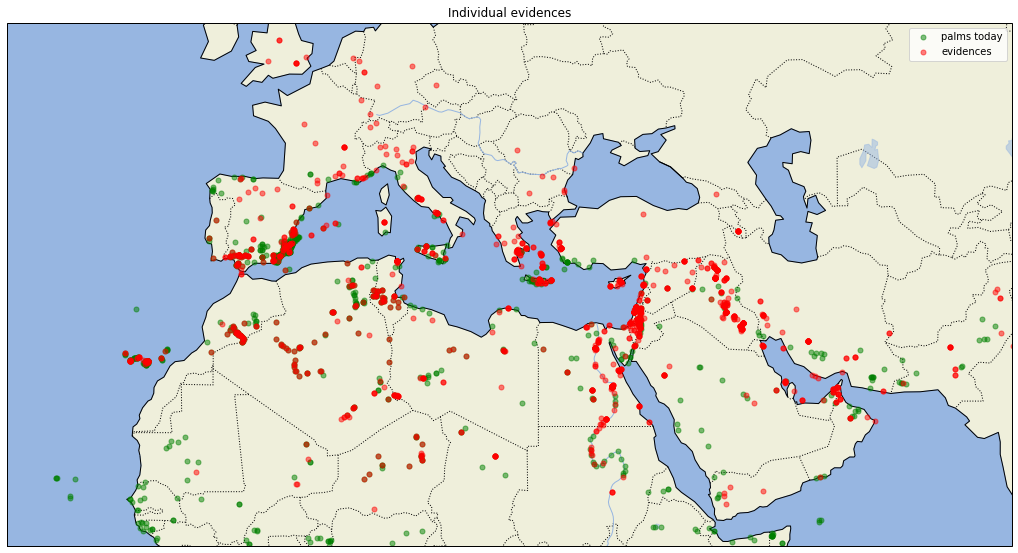

In [16]:
#genmap(figsize=(12,12), extent=[-10, 10, 33, 45])
genmap(figsize=(18,18), extent=region, grid=None);
plt.plot(*np.array(location[bindata[:,0]==1]).T, '.',color='green', markerSize=10, alpha=0.5, transform=lat_lon,label='palms today');
plt.plot(*np.array(location[bindata[:,0]==0]).T, '.',color='red', markerSize=10, alpha=0.5, transform=lat_lon,label='evidences');
plt.legend();
plt.title('Individual evidences');

Evidencias de cada tipo.

In [17]:
np.sum(bindata,axis=0)

array([1408,  203,  252,    4,   64,   36,   38,   17,  524,   57,   13,
        129,   47,   41])

Creación del grid con un cierto tamaño y desplazamiento.

In [18]:
def makeGrid(size=2, offset=0):
    fun = lambda x: np.floor_divide(x-offset,size).astype(int)
    x1,x2,y1,y2 = fun(np.array(region))-[0,1,0,1]
    #print(x1,x2,y1,y2)
    celllocs = np.array( location.apply(fun ))
    cells = {tuple(x) for x in celllocs}
    allcells = {(x,y) for x in range(x1,x2+1) for y in range(y1,y2+1)}
    #emptycells = allcells.difference(cells)
    #print(len(emptycells))
    celldic = { x : np.where( np.all(celllocs == x,axis=1) )[0] for x in allcells }
    data  = { x: bindata[v] for x,v in celldic.items() }
    dataN = { x: d.sum(axis=0) for x,d in data.items() }
    dataB = { x: (v>0).astype(int) for x,v in dataN.items() }
    dataP = { x: v[1:] for x,v in dataB.items() if v[0] == 1 }
    dataN = { x: v[1:] for x,v in dataB.items() if v[0] == 0 }
    S = np.array([v for _,v in dataP.items()]).mean(axis=0)
    E = np.array([1-v for _,v in dataN.items()]).mean(axis=0)
    loc = lambda x: size/2 + x*size + offset
    dataL = { x: loc(np.array(x)) for x in allcells }
    return data, dataB, dataP, dataN, dataL, S,E

Mostramos las celdas de *ground truth* positivas del grid "estándar".

202 942


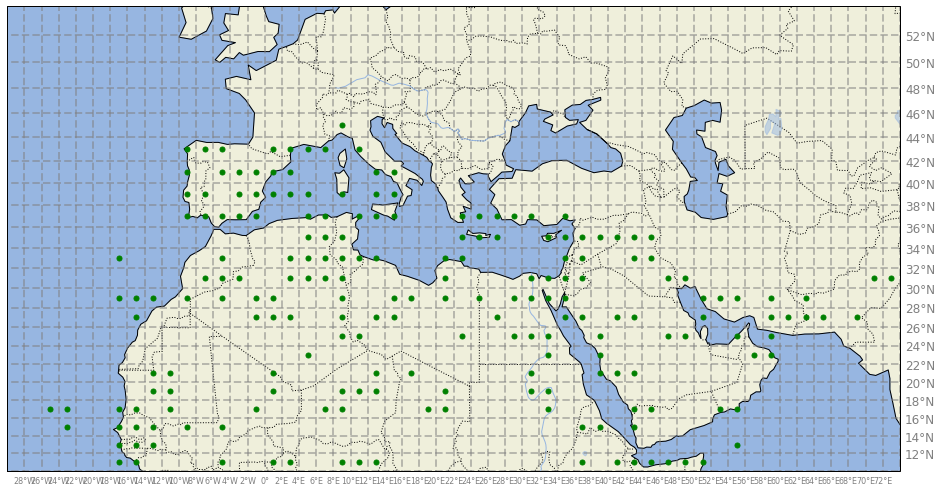

In [19]:
_, dataB, dataP, dataN, dataL, S, E = makeGrid()

print(len(dataP), len(dataN))

genmap(figsize=(16,16), extent=region)

PCells = np.array([dataL[x] for x,_ in dataP.items()])
NCells = np.array([dataL[x] for x,_ in dataN.items()])

plt.plot(*PCells.T, '.',color='green', markerSize=10, transform=lat_lon);
#plt.plot(*NCells.T, '.',color='red',   markerSize=10, transform=lat_lon);

La sensibilidad y especificidad de cada *feature* estimadas con este grid:

In [20]:
S

array([0.11881188, 0.2029703 , 0.0049505 , 0.06930693, 0.04455446,
       0.02970297, 0.01485149, 0.41089109, 0.07425743, 0.02475248,
       0.08415842, 0.08910891, 0.03960396])

In [21]:
E

array([0.98407643, 0.95435244, 1.        , 0.98938429, 0.98832272,
       0.99681529, 0.99787686, 0.98407643, 0.99681529, 0.99787686,
       0.98938429, 0.99787686, 0.99150743])

Utilidades para crear y aplicar los tests.

In [22]:
def sig(z):
    return 1/(1+10**(-z/10))

def lb(p):
    return 10*np.log10(max(p,1e-20))

def llr(p):
    return lb(p) - lb(1-p)

def mkTest(s,e):
    p = lb(s)   - lb(1-e)
    n = lb(1-s) - lb(e) 
    return lambda x: p if x else n

#tests = [ mkTest(s,e) for s,e in zip(S,E) ]


Calculamos la distribución de $s$ y $e$ en una colección de grids de diferentes tamaños y offsets.

In [23]:
Ss,Es  = zip(* [ makeGrid( s,o)[-2:] for s in [1.5, 1.75, 2, 2.25, 2.5, 3] for o in [s*v for v in [0,0.1,0.2,0.3,0.4,0.5]]])
Ss = np.array(Ss)
Es = np.array(Es)

tests = [ mkTest(s,e) for s,e in zip(np.mean(Ss,axis=0),np.mean(Es,axis=0)) ]

In [24]:
def showTest(test):
    bins = np.linspace(0,1,30)
    plt.hist(Ss[:,test], density=True,alpha=0.7, bins=bins);
    plt.hist(Es[:,test], density=True,alpha=0.7, bins=bins);
    testname = list(df.columns)[test+5]
    #plt.title('{}\n s={:.2f}({:.2f}),  e={:.2f}({:.2f})\n {:.1f} | {:.1f} db'.format(testname,Ss[:,test].mean(),Ss[:,test].std() , Es[:,test].mean(), Es[:,test].std(),
     #         tests[test](True),tests[test](False)))
    plt.text(0.2,25,'s={:.2f}({:.2f}),  e={:.2f}({:.2f})\n {:.1f} | {:.1f} db'.format(Ss[:,test].mean(),Ss[:,test].std() , Es[:,test].mean(), Es[:,test].std(),
              tests[test](True),tests[test](False)),color='gray')
    plt.title(testname)
    plt.xlim(0,1); plt.ylim(0,30);

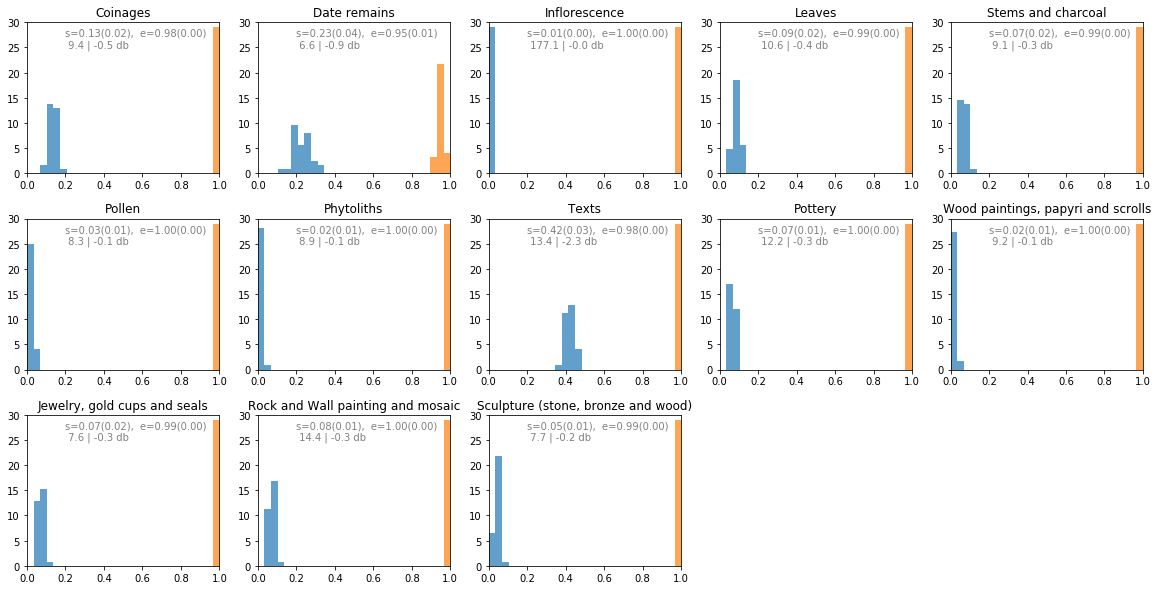

In [25]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3)
for k in range(13):
    plt.subplot(3,5,k+1)
    showTest(k)

Aplicamos los tests en un nuevo grid.

[Jeffreys scale of evidence](https://en.wikipedia.org/wiki/Bayes_factor#Interpretation)

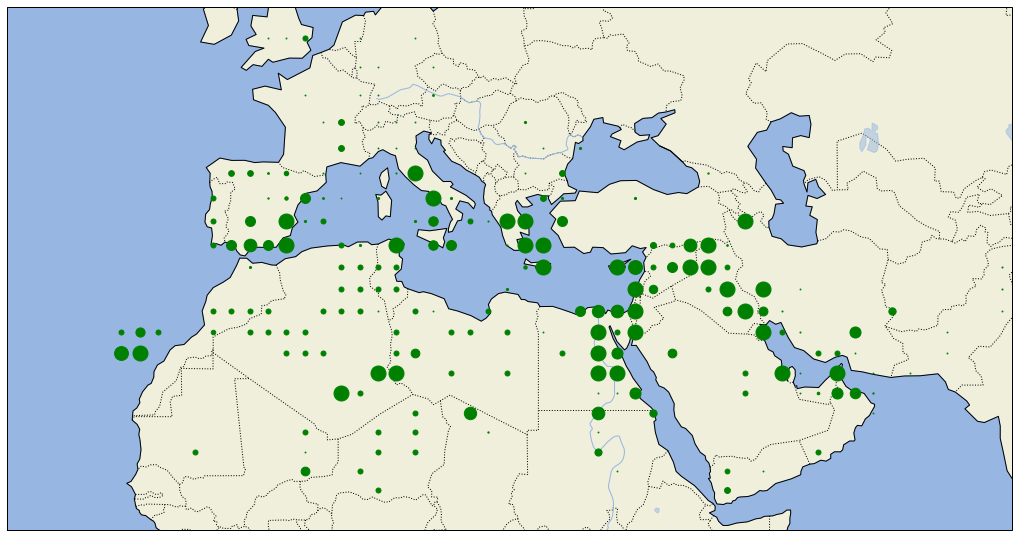

In [26]:
def colorpred(t,p):
    if t==1 and p>0.5: return 'green'
    if t==0 and p<0.5: return 'black'
    if t==0 and p>0.5: return (0.3,0.8,0.3)
    if t==1 and p<0.5: return 'gray'

def colorevidence(t,e):
    if e<5: return 'green'
    if t==0 and p<0.5: return 'black'
    if t==0 and p>0.5: return (0.3,0.8,0.3)
    if t==1 and p<0.5: return 'gray'
    
    
#dataB, _, _, dataL, _, _ = makeGrid()
_, dataB, _, _, dataL, _, _ = makeGrid(size=1.9,offset=-0.15)
    
genmap(figsize=(18,18), extent=region, grid=None)
for c,v in (dataB).items():
    e = sum([t(x) for t,x in zip(tests,v[1:])])
    p = sig(e)
    col = colorpred(v[0],p)
    if e>0:
        #print(e, p)
        plt.plot(*dataL[c],'.',color='green', markerSize=min(e,30), transform=lat_lon)